Help bike sharing company to understand the what are the most drivig variables   

In [1]:
#Import the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read the files
bike_df = pd.read_csv('day.csv')

In [3]:
#Check the data in the data frame
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#Check the shape of the data frame
bike_df.shape

(730, 16)

In [5]:
#Check the data type and non null values in the data frame
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### Drop the columns which are insignificant for the Linear Regression process

In [6]:
# drop column instant and verify the data frame structure
bike_df.drop('instant',axis=1,inplace=True)
bike_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
#Chek the data frame size
bike_df.shape

(730, 15)

In [8]:
#Drop the column dteday and verify the data frame structure
bike_df.drop('dteday',axis=1,inplace=True)
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
#Chek the data frame size
bike_df.shape

(730, 14)

In [10]:
# Drop column 'casual' and 'registered' and verify the data frame structre
# cnt is the target variable and it is the sum of casual and registered. So we can drop the variables casual and registered since they are also target columns
bike_df.drop('casual',axis=1,inplace=True)
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1518,1600


In [11]:
bike_df.shape

(730, 13)

In [12]:
bike_df.drop('registered',axis=1,inplace=True)
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [13]:
bike_df.shape

(730, 12)

#### Check the correlation between variable by plotting a head map and check any other variable can be dropped

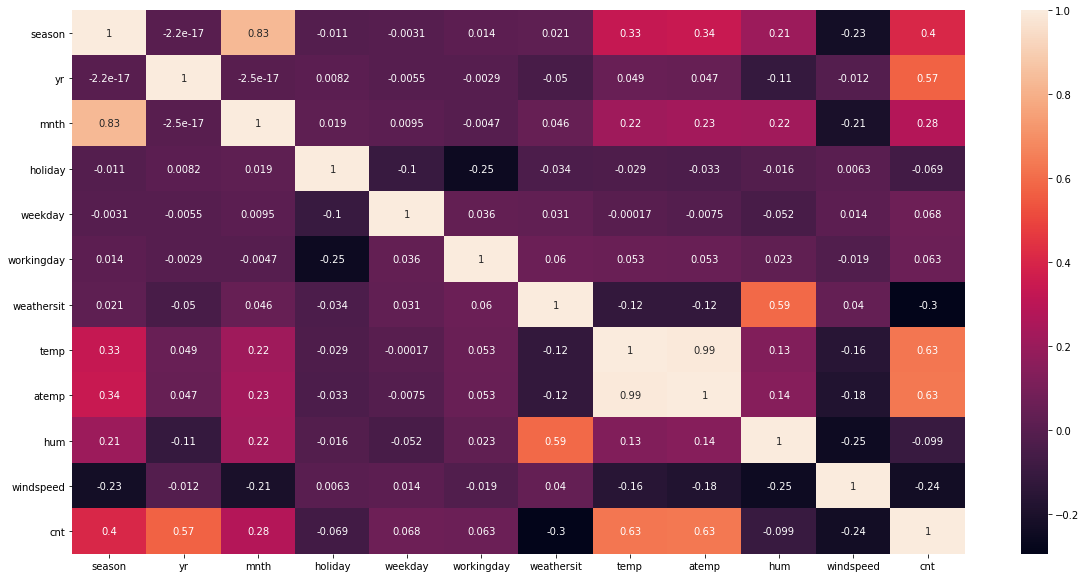

In [14]:
plt.figure(figsize=(20,10))
sns.heatmap(bike_df.corr(),annot=True)

##### From the above heatmap, it is obvious that the columns temp and atemp are highly correlated. So we can drop any one of them
#### Drop column atemp and verify the data frame structure

In [15]:
bike_df.drop('atemp',axis=1,inplace=True)
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


In [16]:
bike_df.shape

(730, 11)

#### Replace the categorical column values

In [17]:
#Check the values in the season column
bike_df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [18]:
#Replace the Season column values
bike_df.season = bike_df.season.apply(lambda x : 'spring' if x == 1 else('summer' if x== 2 else ('fall' if x == 3 else 'winter')))
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


In [19]:
#Replace the mnth column values
import calendar as cal
bike_df.mnth = bike_df.mnth.apply(lambda x: cal.month_abbr[x])
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,6,0,2,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,0,0,2,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,1,1,1,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,2,1,1,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,3,1,1,9.305237,43.6957,12.522300,1600


In [20]:
#Replace the weekday column values
bike_df.weekday = bike_df.weekday.apply(lambda x: cal.day_abbr[x])
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sun,0,2,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Mon,0,2,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Tue,1,1,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Wed,1,1,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Thu,1,1,9.305237,43.6957,12.522300,1600


In [21]:
#Replace the weathersit column values
bike_df.weathersit = bike_df.weathersit.apply(lambda x: 'Clear' if x ==1 else('Mist' if x == 2 else('Light Snow/Rain' if x == 3 else ('Heavey Rain/Snow'))))
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sun,0,Mist,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Mon,0,Mist,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Tue,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Wed,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Thu,1,Clear,9.305237,43.6957,12.522300,1600


#### Create Dummy variables

In [22]:
#Create Dummy Variable for Season column. create n-1 columns, where n is number of unique categorical values
bike_df['spring'] = bike_df.season.apply(lambda x: 1 if x =='spring' else 0)
bike_df['summer'] = bike_df.season.apply(lambda x: 1 if x =='summer' else 0)
bike_df['fall'] = bike_df.season.apply(lambda x: 1 if x =='fall' else 0)
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,fall
0,spring,0,Jan,0,Sun,0,Mist,14.110847,80.5833,10.749882,985,1,0,0
1,spring,0,Jan,0,Mon,0,Mist,14.902598,69.6087,16.652113,801,1,0,0
2,spring,0,Jan,0,Tue,1,Clear,8.050924,43.7273,16.636703,1349,1,0,0
3,spring,0,Jan,0,Wed,1,Clear,8.200000,59.0435,10.739832,1562,1,0,0
4,spring,0,Jan,0,Thu,1,Clear,9.305237,43.6957,12.522300,1600,1,0,0


In [23]:
#Create Dummy Variable for moths. create n-1 columns, where n is number of unique categorical values
for i in bike_df.mnth.unique():
    bike_df[i] = bike_df.mnth.apply(lambda x: 1 if x == i else 0)

In [24]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,spring,0,Jan,0,Sun,0,Mist,14.110847,80.5833,10.749882,...,0,0,0,0,0,0,0,0,0,0
1,spring,0,Jan,0,Mon,0,Mist,14.902598,69.6087,16.652113,...,0,0,0,0,0,0,0,0,0,0
2,spring,0,Jan,0,Tue,1,Clear,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,0,0,0
3,spring,0,Jan,0,Wed,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,0,0,0,0
4,spring,0,Jan,0,Thu,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0


In [25]:
#Drop the last column since we need only n-1 variables
bike_df.drop('Dec',axis=1,inplace=True)

In [26]:
#Dummy Variables for weekday
for i in bike_df.weekday.unique():
    bike_df[i] = bike_df.weekday.apply(lambda x: 1 if x == i else 0)
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,Sep,Oct,Nov,Sun,Mon,Tue,Wed,Thu,Fri,Sat
0,spring,0,Jan,0,Sun,0,Mist,14.110847,80.5833,10.749882,...,0,0,0,1,0,0,0,0,0,0
1,spring,0,Jan,0,Mon,0,Mist,14.902598,69.6087,16.652113,...,0,0,0,0,1,0,0,0,0,0
2,spring,0,Jan,0,Tue,1,Clear,8.050924,43.7273,16.636703,...,0,0,0,0,0,1,0,0,0,0
3,spring,0,Jan,0,Wed,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,Jan,0,Thu,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0


In [27]:
#Drop the last column since we need only n-1 variables
bike_df.drop('Sat',axis=1,inplace=True)

In [28]:
bike_df.shape

(730, 31)

In [29]:
#Dummy Variables for weatherist
for i in bike_df.weathersit.unique():
    bike_df[i] = bike_df.weathersit.apply(lambda x: 1 if x == str(i) else 0)
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,Nov,Sun,Mon,Tue,Wed,Thu,Fri,Mist,Clear,Light Snow/Rain
0,spring,0,Jan,0,Sun,0,Mist,14.110847,80.5833,10.749882,...,0,1,0,0,0,0,0,1,0,0
1,spring,0,Jan,0,Mon,0,Mist,14.902598,69.6087,16.652113,...,0,0,1,0,0,0,0,1,0,0
2,spring,0,Jan,0,Tue,1,Clear,8.050924,43.7273,16.636703,...,0,0,0,1,0,0,0,0,1,0
3,spring,0,Jan,0,Wed,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,0,1,0,0,0,1,0
4,spring,0,Jan,0,Thu,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,1,0,0,1,0


In [30]:
#Drop the last column since we need only n-1 variables
bike_df.drop('Light Snow/Rain',axis=1,inplace=True)

In [31]:
bike_df.shape

(730, 33)

In [32]:
#Drop the categorical columns for which the dummies has been created
bike_df.drop(['season','mnth','weekday','weathersit'],axis=1,inplace=True)

In [33]:
bike_df.shape

(730, 29)

In [34]:
#Import the libraries for the linear regression process
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [35]:
#Create train and test data set
train_df,test_df = train_test_split(bike_df,train_size=0.7,random_state=100)

In [36]:
#Create X_train and y_train
y_train = train_df.pop('cnt')
X_train = sm.add_constant(train_df)

In [37]:
#Instantiate the Linear Regression
lm = LinearRegression()

#Fit the model with the X_train and y_train values
lm.fit(X_train, y_train)

#Run RFE to pick 15 columns
rfe = RFE(lm, 15)             
rfe = rfe.fit(X_train, y_train)

In [38]:
col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'spring', 'summer', 'fall', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
       'Aug', 'Sep', 'Oct', 'Sun', 'Mist', 'Clear'],
      dtype='object')


### Build the model using statsmodel library

In [39]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[col]

#Add Constant
X_train_rfe = sm.add_constant(X_train_rfe)

#Run the model
lm = sm.OLS(y_train,X_train_rfe).fit()  

In [40]:
#Print the linear model summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     129.7
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          2.55e-160
Time:                        21:32:55   Log-Likelihood:                -4179.7
No. Observations:                 510   AIC:                             8391.
Df Residuals:                     494   BIC:                             8459.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        793.2286    252.761      3.138      0.0

Variable `Sun` is insignificant hence can be dropped

In [41]:
X_train_rfe.drop('Sun',axis=1,inplace=True)
X_train_rfe.shape

(510, 15)

In [42]:
#Run the Model
lm = sm.OLS(y_train,X_train_rfe).fit()

#Print model summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     138.8
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          3.73e-161
Time:                        21:32:55   Log-Likelihood:                -4180.3
No. Observations:                 510   AIC:                             8391.
Df Residuals:                     495   BIC:                             8454.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        818.0439    251.727      3.250      0.0

Variable `fall` is insignificant hence can be dropped

In [43]:
X_train_rfe.drop('fall',axis=1,inplace=True)
X_train_rfe.shape

(510, 14)

In [44]:
#Run the Model
lm = sm.OLS(y_train,X_train_rfe).fit()

#Print model summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     145.6
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          8.03e-160
Time:                        21:32:55   Log-Likelihood:                -4186.1
No. Observations:                 510   AIC:                             8400.
Df Residuals:                     496   BIC:                             8459.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        736.7129    253.169      2.910      0.0

Variable `summer` is insignificant hence can be dropped

In [45]:
X_train_rfe.drop('summer',axis=1,inplace=True)
X_train_rfe.shape

(510, 13)

In [46]:
#Run the Model
lm = sm.OLS(y_train,X_train_rfe).fit()

#Print model summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     155.1
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          2.24e-159
Time:                        21:32:56   Log-Likelihood:                -4189.8
No. Observations:                 510   AIC:                             8406.
Df Residuals:                     497   BIC:                             8461.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        668.4588    253.468      2.637      0.0

Variable `Apr` is insignificant hence can be dropped

In [47]:
X_train_rfe.drop('Apr',axis=1,inplace=True)
X_train_rfe.shape

(510, 12)

In [48]:
#Run the Model
lm = sm.OLS(y_train,X_train_rfe).fit()

#Print model summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     168.3
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          7.33e-160
Time:                        21:32:56   Log-Likelihood:                -4191.3
No. Observations:                 510   AIC:                             8407.
Df Residuals:                     498   BIC:                             8457.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        754.0092    249.040      3.028      0.0

In [49]:
#Drop the variable const and check the model 
X_train_rfe.drop('const',axis=1,inplace=True)
X_train_rfe.shape

(510, 11)

In [50]:
#Run the Model
lm = sm.OLS(y_train,X_train_rfe).fit()

#Print model summary
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                              1278.
Date:                Mon, 14 Sep 2020   Prob (F-statistic):                        0.00
Time:                        21:32:56   Log-Likelihood:                         -4195.9
No. Observations:                 510   AIC:                                      8414.
Df Residuals:                     499   BIC:                                      8460.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [51]:
#Drop the vaiable and check the implication on the model
X_train_rfe.drop('spring',axis=1,inplace=True)
X_train_rfe.shape

(510, 10)

In [52]:
#Run the Model
lm = sm.OLS(y_train,X_train_rfe).fit()

#Print model summary
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.951
Model:                            OLS   Adj. R-squared (uncentered):              0.950
Method:                 Least Squares   F-statistic:                              970.8
Date:                Mon, 14 Sep 2020   Prob (F-statistic):                   4.48e-320
Time:                        21:32:57   Log-Likelihood:                         -4287.0
No. Observations:                 510   AIC:                                      8594.
Df Residuals:                     500   BIC:                                      8636.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

From the above two summaries, it is good to keep the variable spring and remove the variable mar

In [53]:
#Add spring variable the data frame
X_train_rfe = pd.concat([X_train_rfe, X_train['spring']], axis = 1)

#Drop the Mar variable
X_train_rfe.drop('Mar',axis=1,inplace=True)

#Check the size of the data frame
X_train_rfe.shape

(510, 10)

In [54]:
#Run the Model
lm = sm.OLS(y_train,X_train_rfe).fit()

#Print model summary
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                              1351.
Date:                Mon, 14 Sep 2020   Prob (F-statistic):                        0.00
Time:                        21:32:57   Log-Likelihood:                         -4206.3
No. Observations:                 510   AIC:                                      8433.
Df Residuals:                     500   BIC:                                      8475.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [55]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Clear,3.37
7,Mist,2.25
0,yr,2.02
9,spring,1.88
4,Aug,1.36
1,May,1.32
2,Jun,1.30
3,Jul,1.29
5,Sep,1.27
6,Oct,1.25


## Residual Analysis of the train data

In [56]:
y_train_pred = lm.predict(X_train_rfe)

In [57]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

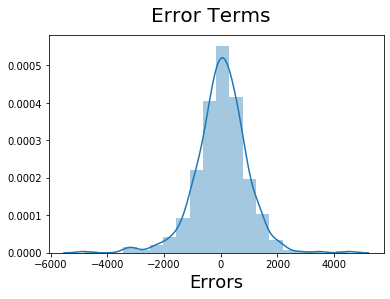

In [58]:
# Plot the histogram of the error terms
fig = plt.figure()
res = (y_train - y_train_pred)
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)                         

### Predict the Target Variable

In [59]:
#Create X_test and y_test
y_test = test_df.pop('cnt')
X_test = test_df

In [60]:
#Create X_test_rfe data with the same column as the X_train_rfe data frame
X_test_rfe = X_test[X_train_rfe.columns]

In [61]:
# Predict the target variable
y_test_pred = lm.predict(X_test_rfe)

### Print the R-Squared score

In [62]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.7800855155289926

### Evaluate the Model

Text(0, 0.5, 'y_pred')

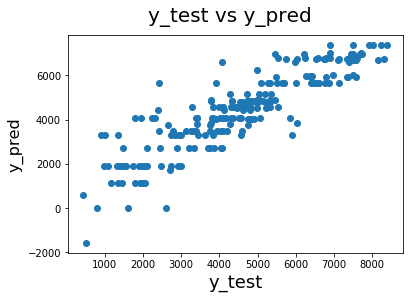

In [63]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

## The below variables are significant in predicting the demand for the shared bikes
- Clear
- Mist
- yr
- spring
- Aug
- May
- Jun
- Jul
- Sep
- Oct

### Following is the order of variables based on their priority(based on absolute coef value)
Variable Name(Coefficient Value)
- Clear(3465.3962)
- Mist(2712.7021)
- yr(2184.6718)
- Sep(1711.1034)
- spring(1584.1244)
- Aug(1363.7877)
- Jun(1321.3588)
- Jul(1118.8462)
- May(1081.3816)
- Oct(1043.6422)
